This notebook loads one xyz volume from a bioformat series (Images shared by João Mamede).  We set channel and series_num to specify which volume to retrieve, create a theoretical PSF (if adjusting for different images, need instrument parameters), and deconvolve using non-circulant Richardson Lucy with Total Variation regularization.   As a final step the images are sent to Napari for 3D visualization. 

The following dependencies need to be installed to run this notebook

``` 
pip install devbio-napari
pip install git+https://github.com/True-North-Intelligent-Algorithms/tnia-python
pip install napari-sdeconv
pip install --index-url https://test.pypi.org/simple/ --no-deps clij2-fft
pip install python-javabridge
pip install python-bioformats
```


In [1]:
from tnia.deconvolution.psfs import gibson_lanni_3D
from tnia.plotting.projections import show_xyz_max, show_xyz_slice
from tnia.io.tifffile_helper import open_ij3D
from clij2fft.richardson_lucy import richardson_lucy, richardson_lucy_nc
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np
import tnia.io.bioformats_helper as bfh

In [2]:
import bioformats as bf

In [3]:
# start jvm for bio formats only run this cell once
bfh.start_jvm()

In [6]:
# define file names and load image

#input_name="D:\\images\\From Joao Mamede\\F2_laminigfpcarub8am-cr#opped2.tif" 

#im, x_voxel_size, y_voxel_size, z_voxel_size = open_ij3D(input_name)
#print(im.shape, x_voxel_size, y_voxel_size, z_voxel_size)

filename='D:\\images\\From Joao Mamede\\F2_laminigfpcarub8am.nd2'
series_num = 12
channel = 1 
im, sx, sy, sz = bfh.load_volume(filename, channel, series_num)
print(im.shape, sx, sy, sz)

(23, 1024, 1024) 0.216666666666667 0.216666666666667 0.5


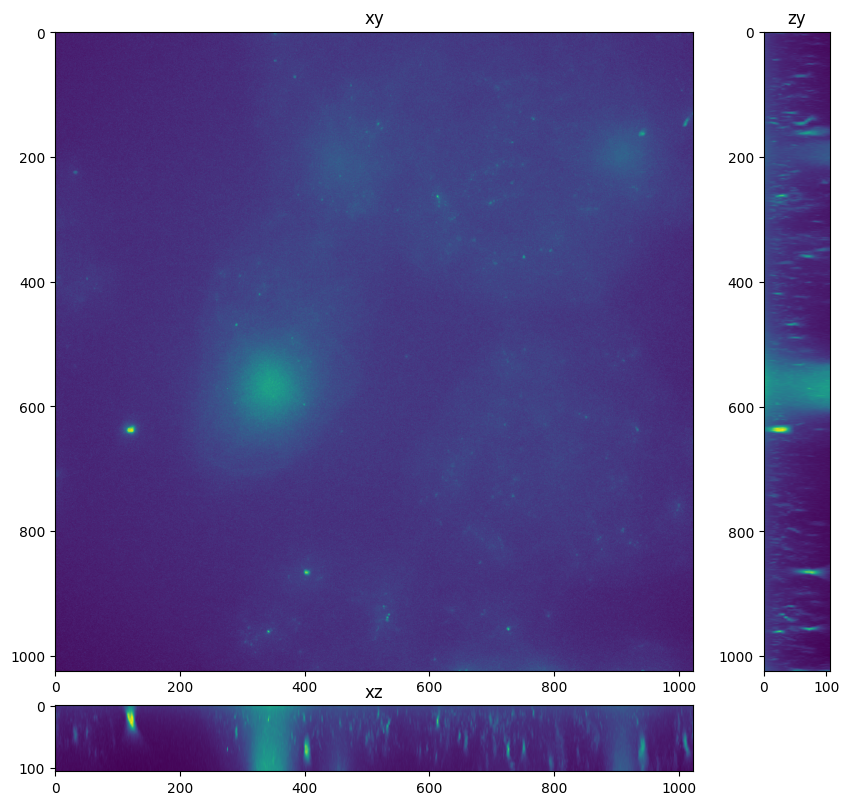

In [7]:
# show max projections of image, artificially increase z spacing just to be able to see the z projections a bit better
fig=show_xyz_max(im,sxy=sx,sz=1)

In [8]:
# show slices of image (need to choose slices that contain objects of interest...)
#fig=show_xyz_slice(im,780,950,11,sxy=sx,sz=1)

sdeconv 1.x.x detected


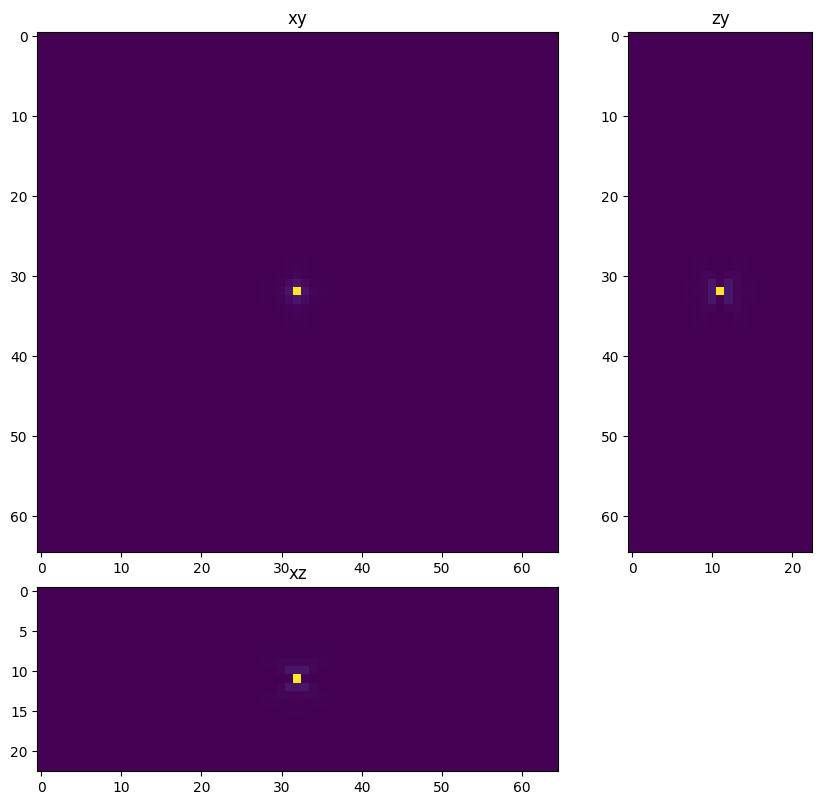

In [9]:
# generate a PSF

# PSF dimensions
xy_psf_dim=65
z_psf_dim=23

# NA  
NA=1.4
# immersion index
ni=1.51
# sample index
ns=1.4

psf = gibson_lanni_3D(NA, ni, ns, sx, sz, xy_psf_dim, z_psf_dim, 0, 0.5)
psf = psf.astype('float32')
fig=show_xyz_max(psf)

In [76]:
# deconvolve the image using non-circulant Richardson Lucy with total variation regularization, 
# 200 iterations, 0.002 regularization factor
decon=richardson_lucy_nc(im, psf, 200, 0.002)

get lib


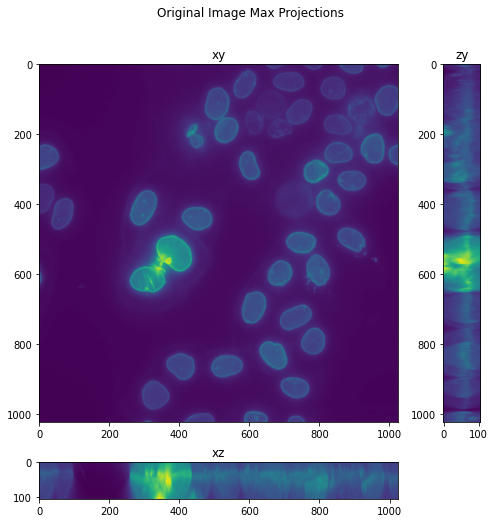

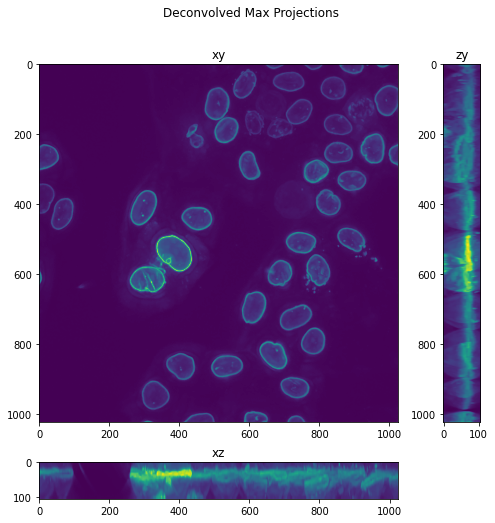

In [77]:
fig=show_xyz_max(im,sxy=sx,sz=1)
fig.set_figheight(8)
fig.set_figwidth(8)
temp=fig.suptitle('Original Image Max Projections')

fig=show_xyz_max(decon,sxy=sx,sz=1)
fig.set_figheight(8)
fig.set_figwidth(8)
temp=fig.suptitle('Deconvolved Max Projections')

In [78]:
# view in Napari
import napari
viewer=napari.Viewer()
# send to Napari (exagerrate the z scaling to make it easier to evaluate the result)
viewer.add_image(im,scale=[5,1,1])
viewer.add_image(decon,scale=[5,1,1])


<Image layer 'decon' at 0x1a86dad51c0>

Exception in callback BaseAsyncIOLoop._handle_events(8660, 1)
handle: <Handle BaseAsyncIOLoop._handle_events(8660, 1)>
Traceback (most recent call last):
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\tornado\platform\asyncio.py", line 189, in _handle_events
    handler_func(fileobj, events)
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\zmq\eventloop\zmqstream.py", line 448, in _handle_events
    self._handle_recv()
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\zmq\eventloop\zmqstream.py", line 477, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\zmq\eventloop\zmqstream.py", line 431, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-pac